# Cats and Qubits

Quantum Mechanics has fundamentally changed the way we study natural phenomena on microscopic scales. However, we've only just started to realize how quantum mechanics can also revolutionize information processing and computer science. Making use of the powerful albeit sometimes unintuitive quantum phenomena has created the new and promising field of quantum computing.

Classical information processing begins with a bit, and analogously quantum computing begins with a qubit. Information is measured in bits, where each bit will only ever be in one of two possible states (commonly referred to as "0" and "1"). A qubit is a two state quantum-system, so it's quite similar in that they only ever hold one bit of information, but the superposition principle in quantum mechanics allows a qubit to occupy any one of the continuum of states in hilbert space - sounds like a contradiction, huh?

Remember that eventhough a quantum system can occupy any state in hilbert space, the only way we can get information from a qubit is by measuring it, at which point the state will collapse to one of the two possible basis states. For simplicity, let's choose a measurement operator which communtes with the hamiltonian of our system, so we don't have to worry about the time dependence of our system. Now we can define the two eigenstates of our measurement operator to be $|0\rangle$ and $|1\rangle$ which forms our "computational basis." (In practice, the measurement operator that forms our computational basis usually is the hamiltonian.)

So in general, the state of our qubit $|\psi \rangle$ can be written as:

$$ |\psi \rangle = \alpha |0\rangle + \beta |1\rangle $$

for any $\alpha$ and $\beta$ such that $|\alpha|^2 + |\beta|^2 = 1$.

## Quantum Circuits

Just as classical bits are processed in circuits with logic gates, qubits are processed in quantum circuits using quantum logic gates.

A very convenient framework for building, and simulating quantum circuits using python is `qiskit`, which we'll use now.

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer # for simulating circuits
from qiskit.tools.visualization import plot_histogram
from qiskit import execute

In `qiskit`, you can create either `QuantumRegister`s or `ClassicalRegister`s to hold quantum or classical information respectively. These registers can be added to your quantum circuit to process the information therein.

For details on the API, execute a cell with `QuantumRegister?` or `QuantumCircuit?`. For now, let's create a quantum circuit using 1 qubit

In [2]:
q = QuantumRegister(1, 'q') # specify the number of qubits in the register and a name

circ = QuantumCircuit(q)

Your circuits can be visualized using the `draw` function.

In [3]:
circ.draw()

So far our circuit doesn't look very exciting, so let's add a hadamard gate. Remember a hadamard gate rotates our state from the Z (computational) basis to the X basis.

In [4]:
circ.h(q[0])
circ.draw()

Now we can simulate our circuit to do some basic quantum computing. First, you have to choose what kind of backend to use, we'll using two different backends called `statevector_simulator` to compute the final state of your system, and the `qasm_simulator` to simulate a quantum computer running your circuit (which means you have to measure your qubits at the end). However there are also some backends that will run your circuit on a real quantum computer (for more information check out IMBQ Experience).

After choosing your backend, you can create a job using the `execute` function.
You can monitor your job using the `status` function (although the jobs should complete quickly if you use simulators).

In [5]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(circ, backend)

In [6]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

Once your job is done, you can collect the results using the `result` function. In our case, since we used the `statevector_simulator` backend, we can get the final statevector using the `get_statevector` function, which also allows us to specify the desired precision.

In [9]:
result = job.result()
outputstate = result.get_statevector(circ, decimals=8)
print(outputstate)

[0.70710678+0.j 0.70710678+0.j]


Note that the statevector contains the amplitudes for each possible outcome in the computation basis which are in general complex.

Given statevector $|\psi \rangle = \begin{pmatrix}\alpha \\ \beta\end{pmatrix}$, the probability of measuring $0$ is $\mathrm{Prob}(0) = |\alpha|^2$.

In [10]:
probs = np.abs(outputstate)**2
print(probs)

[0.5 0.5]


Note that the probabilities don't add up to 1, as they should for a properly normalized state. To fix this, you can increase the precision (using the `decimals` argument) of the statevector we got from the result. Try increasing the precision to 8 decimals and printing out the improved estimate.

## Cat States

Named after Schrödinger's (possibly) misfortunate cat, a cat state is an equal superposition with only two possible, very opposite outcomes.

$$ |\mathrm{🐱} \rangle = \frac{1}{\sqrt{2}} (|000\dots00 \rangle + |111\dots11 \rangle) $$

Are the individual qubits in a cat state entangled? How do you know?

__Answer__:

The result of a measument of the system above could result in only two outcomes: $ |000\dots0 \rangle $ or $ |111\dots1 \rangle $. As a result, if the result of the measument of 1st bit is $ |0\rangle $, all other bits outcomes should be $ |0\rangle $s. Same is true if the measurment of a bit result in $ |1\rangle $: all other bits' measument outcomes woule be $ |1\rangle $.  This means that outcome of a measument of one bit determines the outcomes of measuments on all other bits. In other words, all the bits are entangled.

Starting from the default state of all zeros, let's build to circuit to create a cat state for a two qubit system.

In [11]:
q = QuantumRegister(2, 'cat')
circ = QuantumCircuit(q)
circ.draw()

We'll need another hadamard - in fact, essentially all quantum circuits begin with atleast one hadamard, any ideas why?

In [12]:
circ.h(q[0])
circ.draw()

Next we'll use a controlled NOT gate (aka CNOT or CX), which is a very important binary gate. The CNOT gate takes a control qubit and a target qubit as input, and inverts (applies an X gate) the target qubit if and only if the control qubit is 1.

Classically, such a gate is nothing special, but in the quantum realm, thanks to superposition, the CNOT gate allows us entangle qubits.

In [13]:
circ.cx(q[0],q[1])
circ.draw()

Now let's simulate our gate to compute the resulting state.

In [14]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
catstate = result.get_statevector(circ)
print('Statevector:', catstate)
print('Probabilities:', np.abs(catstate)**2)

Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Probabilities: [0.5 0.  0.  0.5]


Remember the dimensions are ordered: $00$, $01$, $10$, $11$, so the state we are left with after applying our circuit can only have two outcomes: $00$ or $11$ - or in cat speak - very dead or very alive.

Real quantum algorithms use a combination of quantum and classical circuits to process information. `qiskit` allows us to include classical registers to store the measured outcomes of our quantum circuits.

In [15]:
c = ClassicalRegister(2, 'c')

In [16]:
circ.add_register(c)
circ.measure(q[0], c[0])
circ.measure(q[1], c[1])
circ.draw()

Now let's use the other backend, `qasm_simulator` to simulate running our circuit on real hardware, in which case we don't have access to the full state vector. Instead we merely get a single outcome each time run our circuit, so we can conduct many trials to get a sense of the statistics.

When submitting the job, we can use the `shots` argument to specify how many independent trials we want to run.

In [17]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=1000)
result = job.result()

After running the job we can view a histogram of the outcomes.

{'11': 497, '00': 503}


<IPython.core.display.Javascript object>


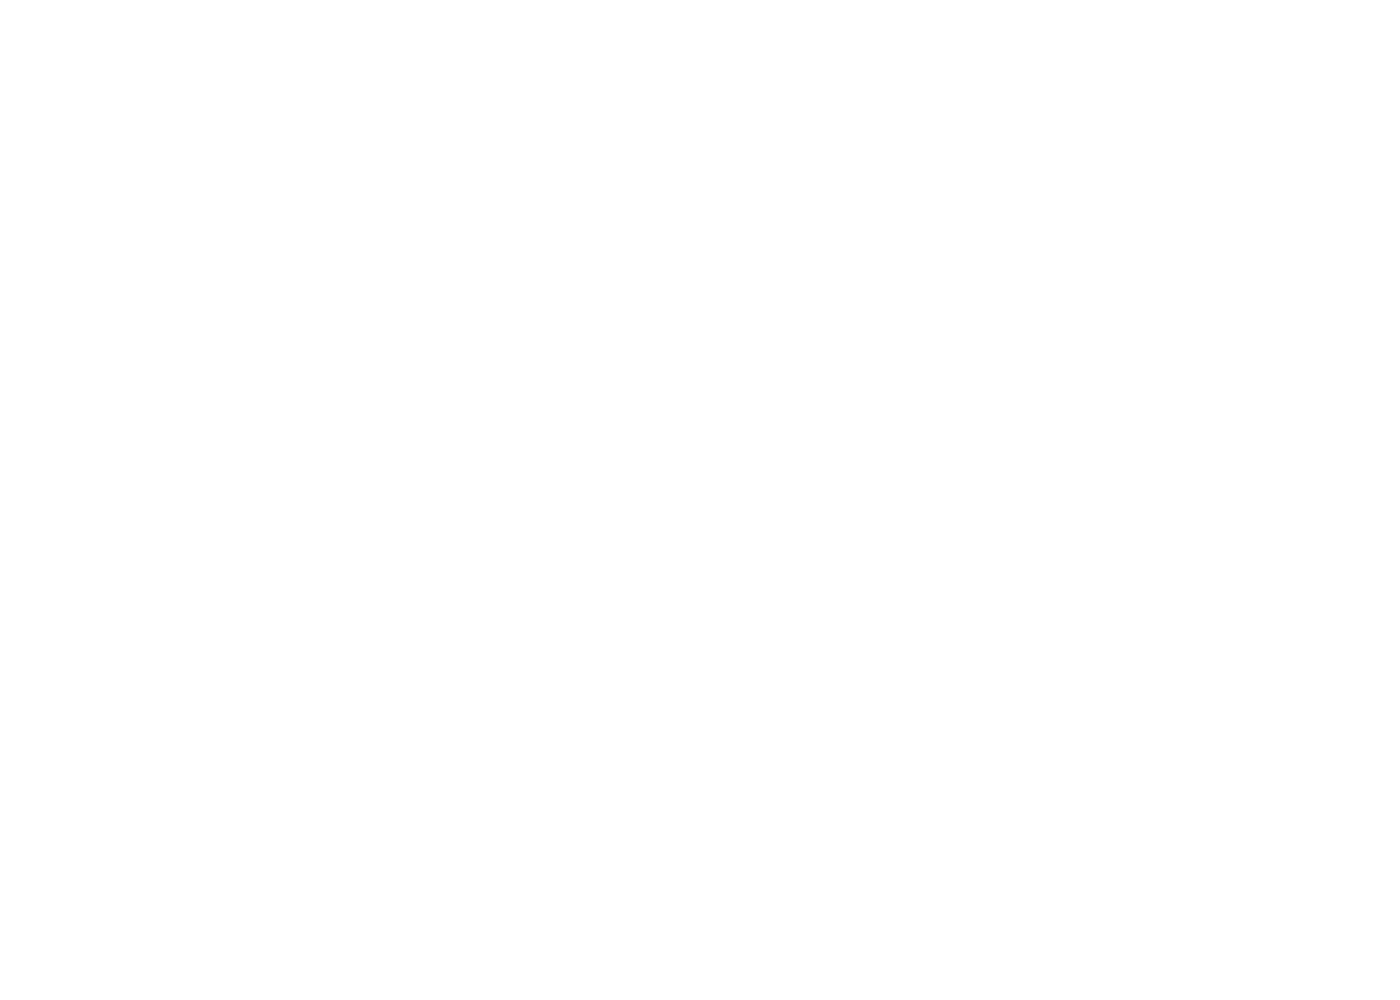

<IPython.core.display.Javascript object>


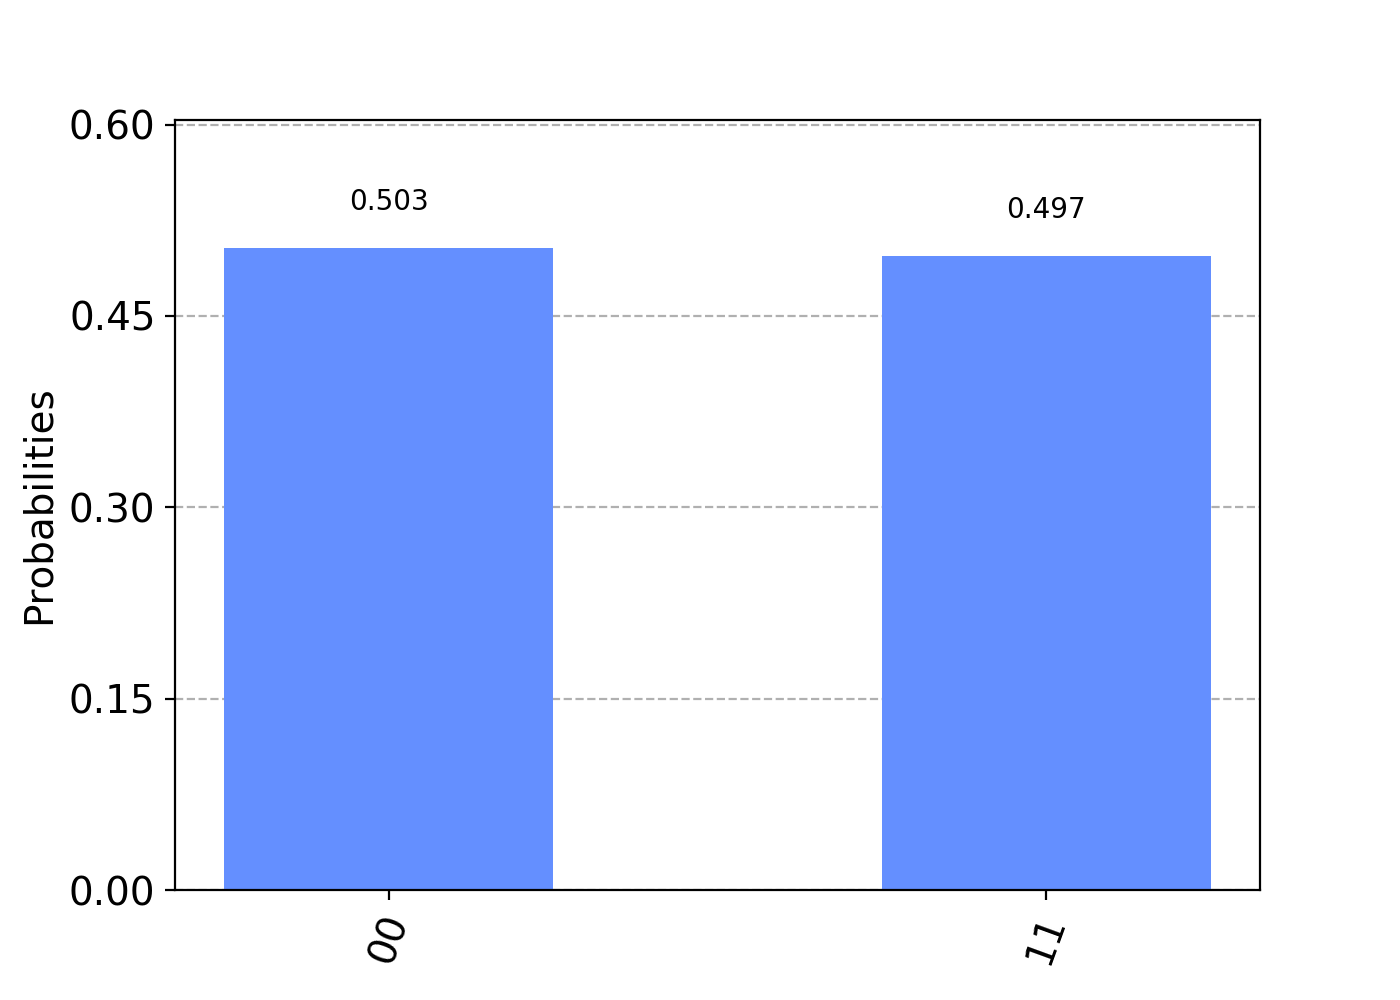

In [18]:
counts = result.get_counts()
print(counts)
plot_histogram(counts)

### Problem 1: Three Qubit Cat

Build a quantum circuit that produces a 3 qubit cat state and confirm that it is a cat state by simulating your circuit using the `statevector_simulator` and printing the resulting statevector.

In other words, starting from the (default) state $| \psi \rangle = |000\rangle$, build a circuit $\hat{\mathbf{U}}$ which has the following effect:

$$ \hat{\mathbf{U}} |\psi\rangle = \frac{1}{\sqrt{2}}(|000\rangle + |111\rangle) $$

Hint: Start with the circuit above to produce a two qubit cat state.

In [33]:
q = QuantumRegister(3, 'cat3')
circ = QuantumCircuit(q)
circ.h(q[0])
circ.cnot(q[0], q[1])
circ.cnot(q[0], q[2])
print(circ.draw())

backend = BasicAer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
catstate = result.get_statevector(circ)
print('\nStatevector = ', catstate)
print('\nProbabilities = ', np.abs(catstate)**2)

           ┌───┐          
cat3_0: |0>┤ H ├──■────■──
           └───┘┌─┴─┐  │  
cat3_1: |0>─────┤ X ├──┼──
                └───┘┌─┴─┐
cat3_2: |0>──────────┤ X ├
                     └───┘

Statevector =  [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

Probabilities =  [0.5 0.  0.  0.  0.  0.  0.  0.5]


### Problem 2: Super Superpositions

The real power of quantum computing comes from the parallelism. Thanks to quantum superposition states, applying a single quantum gate to $n$ qubits can affect all $2^n$ possible outcomes those qubits can have in parallel. As a result, most quantum algorithms try to take full advantage of this parallelism by starting with a state that's an equal superposition of all possible outcomes.

Build a 3 qubit quantum circuit that transforms the initial state $|000\rangle$ to an equal superposition of all 8 possible outcomes. Test your circuit using the `qasm_simulator` and plot the outcomes of 1000 shots in a histogram.

Hint: In order to collect the counts of applying your circuits you need to measure your qubits and save them to a classical register. Also, the simplest solution does not require any gates that weren't used above.

           ┌───┐┌─┐      
cat3_0: |0>┤ H ├┤M├──────
           ├───┤└╥┘┌─┐   
cat3_1: |0>┤ H ├─╫─┤M├───
           ├───┤ ║ └╥┘┌─┐
cat3_2: |0>┤ H ├─╫──╫─┤M├
           └───┘ ║  ║ └╥┘
    c_0: 0 ══════╩══╬══╬═
                    ║  ║ 
    c_1: 0 ═════════╩══╬═
                       ║ 
    c_2: 0 ════════════╩═
                         
{'011': 124, '010': 115, '111': 126, '100': 123, '000': 140, '110': 127, '001': 122, '101': 123}


<IPython.core.display.Javascript object>


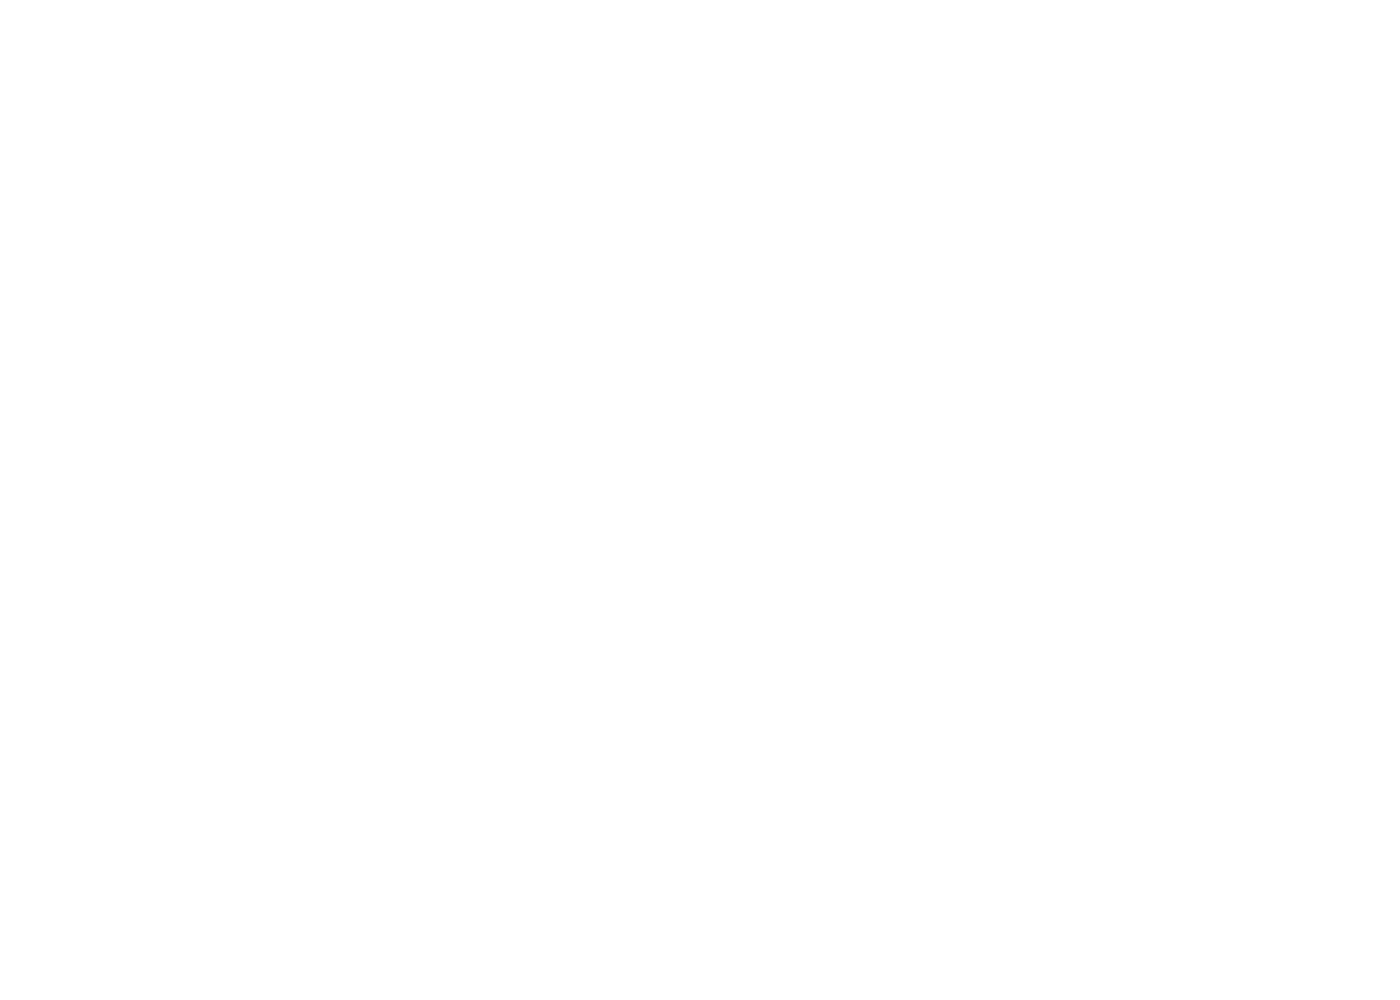

<IPython.core.display.Javascript object>


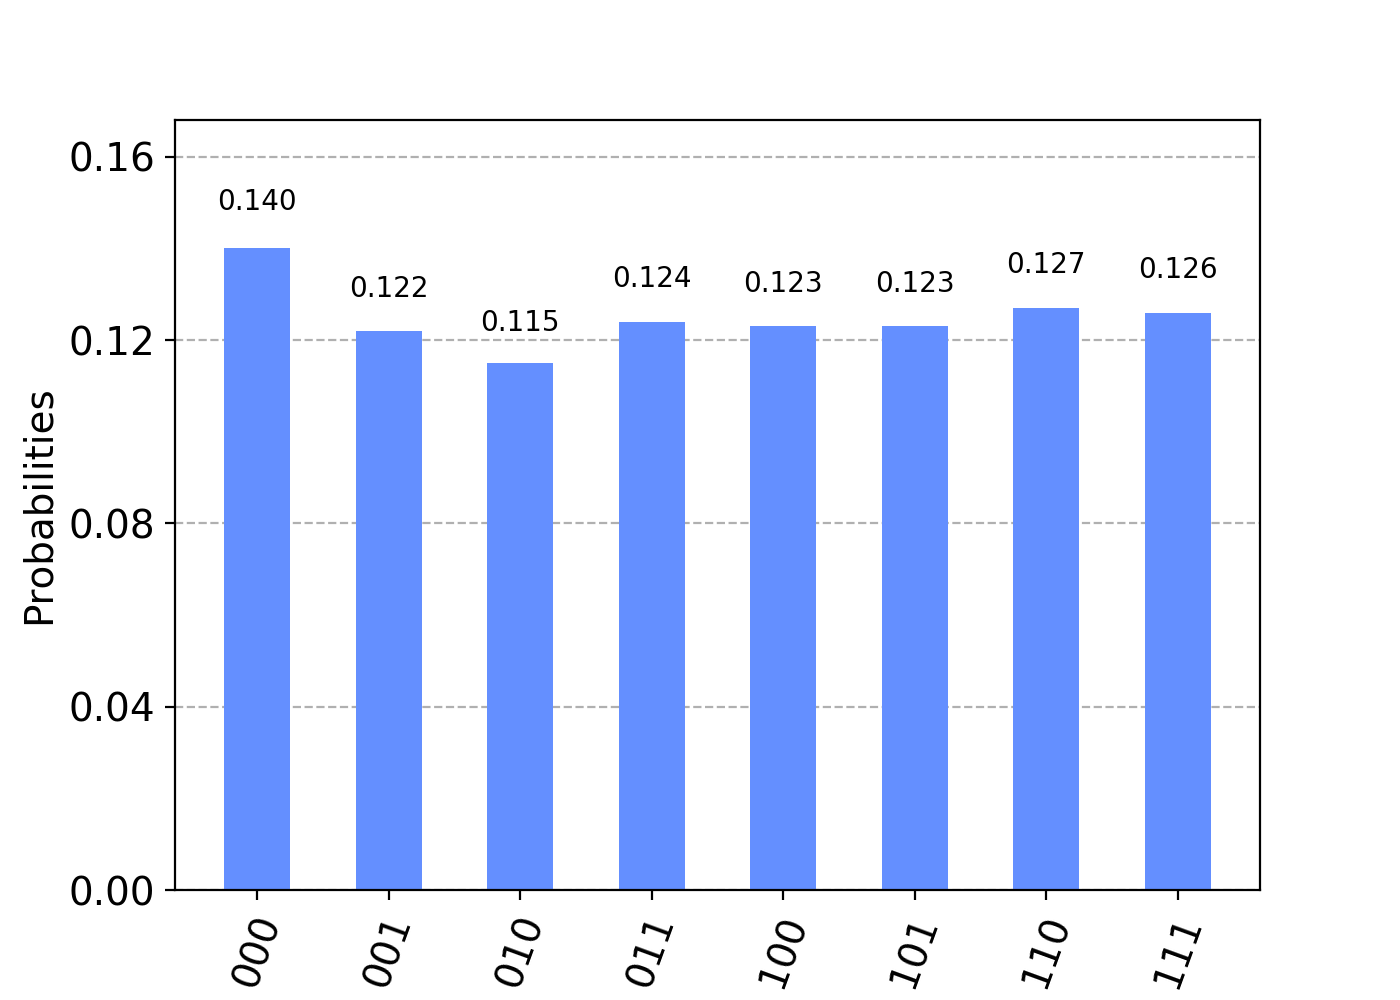

In [42]:
q = QuantumRegister(3, 'cat3')
c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(q)
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.add_register(c)
circ.measure(q[0], c[0])
circ.measure(q[1], c[1])
circ.measure(q[2], c[2])
print(circ.draw())

backend = BasicAer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)